# Lab 2: Hand Gesture Recognition

This lab is based on an assignment developed by Prof. Lisa Zhang.

This lab will be completed in two parts. In Part A you will gain experience gathering your own data set (specifically images of hand gestures), and understand the challenges involved in the data cleaning process. In Part B you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Generate and preprocess your own data
2. Load and split data for training, validation and testing
3. Train a Convolutional Neural Network
4. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

**Submission for Part A:**  
Submit a zip file containing your images. Three images each of American Sign Language gestures for letters A - I (total of 27 images). You will be required to clean the images before submitting them. Details are provided under Part A of the handout.

Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg).


**Submission for Part B:**  
Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1esTSdMLsJUn0rg7NLbBpj3IpNcBk462m?usp=sharing

# Part A. Data Collection [10 pt]

So far, we have worked with data sets that have been collected, cleaned, and curated by machine learning
researchers and practitioners. Datasets like MNIST and CIFAR are often used as toy examples, both by
students and by researchers testing new machine learning models.

In the real world, getting a clean data set is never that easy. More than half the work in applying machine
learning is finding, gathering, cleaning, and formatting your data set.

The purpose of this lab is to help you gain experience gathering your own data set, and understand the
challenges involved in the data cleaning process.

### American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing.

The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)


### Generating Data
We will produce the images required for this lab by ourselves. Each student will collect, clean and submit
three images each of Americal Sign Language gestures for letters A - I (total of 27 images)
Steps involved in data collection

1. Familiarize yourself with American Sign Language gestures for letters from A - I (9 letters).
2. Take three pictures at slightly different orientation for each letter gesture using your
mobile phone.
 - Ensure adequate lighting while you are capturing the images.
 - Use a white wall as your background.
 - Use your right hand to create gestures (for consistency).
 - Keep your right hand fairly apart from your body and any other obstructions.
 - Avoid having shadows on parts of your hand.
3. Transfer the images to your laptop for cleaning.

### Cleaning Data
To simplify the machine learning the task, we will standardize the training images. We will make sure that
all our images are of the same size (224 x 224 pixels RGB), and have the hand in the center of the cropped
regions.

You may use the following applications to crop and resize your images:

**Mac**
- Use Preview:
– Holding down CMD + Shift will keep a square aspect ratio while selecting the hand area.
– Resize to 224x224 pixels.

**Windows 10**
- Use Photos app to edit and crop the image and keep the aspect ratio a square.
- Use Paint to resize the image to the final image size of 224x224 pixels.

**Linux**
- You can use GIMP, imagemagick, or other tools of your choosing.
You may also use online tools such as http://picresize.com
All the above steps are illustrative only. You need not follow these steps but following these will ensure that
you produce a good quality dataset. You will be judged based on the quality of the images alone.
Please do not edit your photos in any other way. You should not need to change the aspect ratio of your
image. You also should not digitally remove the background or shadows—instead, take photos with a white
background and minimal shadows.

### Accepted Images
Images will be accepted and graded based on the criteria below
1. The final image should be size 224x224 pixels (RGB).
2. The file format should be a .jpg file.
3. The hand should be approximately centered on the frame.
4. The hand should not be obscured or cut off.
5. The photos follows the ASL gestures posted earlier.
6. The photos were not edited in any other way (e.g. no electronic removal of shadows or background).

### Submission
Submit a zip file containing your images. There should be a total of 27 images (3 for each category)
1. Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg)
2. Zip all the images together and name it with the following convention: last-name_student-number.zip
(e.g. last-name_100343434.zip).
3. Submit the zipped folder.
We will be anonymizing and combining the images that everyone submits. We will announce when the
combined data set will be available for download.

![alt text](https://github.com/UTNeural/APS360/blob/master/Gesture%20Images.PNG?raw=true)

# Part B. Building a CNN [40 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

### Part 1. Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/master/torchvision/datasets.html#imagefolder
) 

## **What am I doing for splitting the dataset?**

1. First, I am creating train, test and validation folders. 
2. Then, in each of the train, test and validation folders, I am creating seperate folders for the classes A to I. 
3. Then, I am extracting the name of the files in each folder of the full dataset, and getting the starting number ('ex - 1, 2,.. 72)
4. Once I do that, I am keeping all the data whose file name starts from 1 till 71 in the training set. 
5. From 72 to 82, I am keeping in the test dataset. 
6. Anything above 82, I am keeping in the validation dataset.

I am splitting based on the names of the files so that no particular hand can go to the train andd test/validation set as well. 

I am keeping the test images to be lesser than validation because I want the model to be exposed to more data in the validation and training phase. 

Totally, test dataset has 266 images. Validation dataset has 504 images. The train dataset has 1671 images. 

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import os
import shutil
from torch.utils.data import TensorDataset

In [5]:
#creating new folders in the google drive
def create_folders(pth):
  if not os.path.isdir(pth):
      os.makedirs(pth)

#splits the dataset based on the number in the file names
def split_dataset():
    # Creating training, validation and test folders
    create_folders('/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Train')
    create_folders('/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Test')
    create_folders('/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Validation')

    #appending the training, test and validation folders with images
    for cls in classes:
      create_folders(f'/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Train/{cls}/')
      create_folders(f'/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Test/{cls}/')
      create_folders(f'/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Validation/{cls}/')
      temp_fl_list = os.listdir(f'/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Lab_3b_Gesture_Dataset/{cls}')
      for fl in temp_fl_list:
          threshold_num = int(fl.split('_')[0])
          if threshold_num < 72:
              shutil.copy(f'/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Lab_3b_Gesture_Dataset/{cls}/{fl}', f'/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Train/{cls}/{fl}')
          elif threshold_num >= 72 and threshold_num <= 82:
              shutil.copy(f'/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Lab_3b_Gesture_Dataset/{cls}/{fl}', f'/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Test/{cls}/{fl}')
          else:
              shutil.copy(f'/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Lab_3b_Gesture_Dataset/{cls}/{fl}', f'/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Validation/{cls}/{fl}')
  
#loading the data
def get_data_loader(pth, batch_size):

    transform = transforms.Compose(
        [transforms.Resize((224,224)), transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    
    # Load  training data
    tempset = torchvision.datasets.ImageFolder(pth, transform=transform)
    temp_sampler = SubsetRandomSampler([*range(0,len(tempset.samples))])
    temp_loader = torch.utils.data.DataLoader(tempset, batch_size=batch_size, num_workers=1, sampler=temp_sampler)

    return temp_loader

In [17]:
classes = ('A', 'B', 'C', 'D',
               'E', 'F', 'G', 'H', 'I')

In [18]:
split_dataset()

In [ ]:
train_data_loader = get_data_loader('/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Train', 1)
test_data_loader = get_data_loader('/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Test', 1)
val_data_loader = get_data_loader('/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Validation', 1)

### Part 2. Model Building and Sanity Checking [9 pt]

### Part (a) Convolutional Network - 3 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

I am choosing three convolutional layers and two linear layers for my architecture. The reason I am also adding the convolutional layers is because, convolutional layer is able to extract the different features in the images effectively without any lose of information. By identifying the different patterns in the images, it is aiding the linear layers to extract features for more efficient classification of the images. 

I am using pooling layer of 5,5 because I want to reduce the dimensions of the feature map, therfore reducing the number of parameters and the computational complexity. 

I am using 1 hidden layer. I am also using ReLu as the activation function as it has been empirically proven to be faster in converging and hence reduces the time and computational complexity.

As I am having a larger pooling layer, I could afford to increase the number of output channels and hence I am doing that to gain more information, while also not drastically increasing the number of parameters. 

In [ ]:
#defining the structure
class letterclassifier(nn.Module):
    def __init__(self):
        super(letterclassifier, self).__init__()
        self.name = "letterclassifier"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(5, 5)
        self.conv2 = nn.Conv2d(5, 7, 3)
        self.conv3 = nn.Conv2d(7, 14, 3)
        self.fc1 = nn.Linear(14, 200)
        self.fc2 = nn.Linear(200, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 14)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### Part (b) Training Code - 3 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

**Loss function:**
I am using Cross Entropy Loss function because cross entropy results in a smooth reduction in loss as we move from bad predictions to good predictions and aids in minimizing the loss, as opposed to something like Mean Squared error which actually increases even when the model predicts the right class with high probability. 

**Optimizer**: I ams using Adam's Optimizer because it is easy to implement, works well with noisy gradients, large datasets and large parameters. 

In [49]:
#this function can get the accuracy of the train/val or test loader and loss also if needed. 

def get_accuracy(model, train_loader, val_loader, test_loader, train=False, test = False, loss = False, criterion = None, sanity_check = False):
    
    use_cuda = True
    if train or sanity_check:
        data = train_loader
    else:
        data = val_loader

    if test:
      data = test_loader

    correct = 0
    total = 0
    loss_ = 0
    c = 0
    if loss == True:
      for imgs, labels in data:

        #############################################
        #To Enable GPU Usage
          if use_cuda and torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
        #############################################
          c+=1
          output = model(imgs)
          loss_ = criterion(output, labels)
          loss_ += loss_.item()
          #select index with maximum prediction score
          pred = output.max(1, keepdim=True)[1]
          correct += pred.eq(labels.view_as(pred)).sum().item()
          total += imgs.shape[0]
          return correct / total, float(loss_) / (c)
    if loss == False:
      for imgs, labels in data:
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
        #############################################
        c+=1
        output = model(imgs)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
      return correct / total 



In [7]:
#this code gets the name of the model
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path


In [8]:
#this code plots the training accuracy and loss curve of the model
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_acc.csv".format(path))
    val_err = np.loadtxt("{}_val_acc.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [9]:
#This function is trains the neural network based on the batch size, epochs and the learning rates 
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30, transfer_learning = False):
    #use_cuda = True
    classes = ('A', 'B', 'C', 'D',
               'E', 'F', 'G', 'H', 'I', 'J')
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################

    if transfer_learning == True:
      train_feature = torch.load('/content/gdrive/MyDrive/Lab 2 Dataset/features_train.pt')
      val_feature = torch.load('/content/gdrive/MyDrive/Lab 2 Dataset/features_val.pt')
      test_feature = torch.load('/content/gdrive/MyDrive/Lab 2 Dataset/features_test.pt')
      train_labels = torch.load('/content/gdrive/MyDrive/Lab 2 Dataset/labels_train.pt')
      val_labels = torch.load('/content/gdrive/MyDrive/Lab 2 Dataset/labels_val.pt')
      test_labels = torch.load('/content/gdrive/MyDrive/Lab 2 Dataset/labels_test.pt')
      train_loader = torch.utils.data.DataLoader(TensorDataset(train_feature, train_labels), batch_size=batch_size)
      val_loader = torch.utils.data.DataLoader(TensorDataset(val_feature, val_labels), batch_size=batch_size)
      test_loader = torch.utils.data.DataLoader(TensorDataset(test_feature, test_labels), batch_size=batch_size)
    else:
      train_loader = get_data_loader('/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Train', batch_size)
      test_loader = get_data_loader('/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Test', batch_size)
      val_loader = get_data_loader('/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Validation', batch_size)

    # Define the Loss function and optimizer
    # Optimizer will be SGD with Momentum.
    criterion = nn.CrossEntropyLoss()
    #optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    optimizer = optim.Adam(net.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_acc = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_acc = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################

    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_acc = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              inputs = inputs.cuda()
              labels = labels.cuda()
            #############################################
            
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            total_train_loss += loss.item()
            total_epoch += len(labels)

        train_loss[epoch] = float(total_train_loss) / (i+1)
        train_acc[epoch] = get_accuracy(net, train_loader, val_loader, test_loader, train=True, test = False)

        with torch.no_grad():
          val_acc[epoch], val_loss[epoch] = get_accuracy(net, train_loader, val_loader, test_loader, train=False, test = False, loss = True, criterion= criterion)
        print(("Epoch {}: Train acc: {}, Train loss: {} |"+
               "Validation acc: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_acc[epoch],
                   train_loss[epoch],
                   val_acc[epoch],
                   val_loss[epoch]))
        
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)

        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_acc.csv".format(model_path), train_acc)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_acc.csv".format(model_path), val_acc)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

In [ ]:
use_cuda = True

net = letterclassifier()

if use_cuda and torch.cuda.is_available():
  net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')


CUDA is available!  Training on GPU ...


In [ ]:
train_net(net, batch_size=128, learning_rate=0.01, num_epochs=30)

Epoch 1: Train acc: 0.22034918723660446, Train loss: 2.156548390021691 |Validation acc: 0.28125, Validation loss: 3.7341935634613037
Epoch 2: Train acc: 0.4370860927152318, Train loss: 1.8105918352420514 |Validation acc: 0.4375, Validation loss: 2.8824191093444824
Epoch 3: Train acc: 0.5665261890427453, Train loss: 1.4819550147423377 |Validation acc: 0.515625, Validation loss: 2.4080471992492676
Epoch 4: Train acc: 0.605057194461168, Train loss: 1.2538354213421161 |Validation acc: 0.5703125, Validation loss: 2.2206382751464844
Epoch 5: Train acc: 0.6447922937989163, Train loss: 1.08313656770266 |Validation acc: 0.6953125, Validation loss: 1.692769169807434
Epoch 6: Train acc: 0.6556291390728477, Train loss: 0.9671427836784949 |Validation acc: 0.53125, Validation loss: 2.1917014122009277
Epoch 7: Train acc: 0.7332931968693558, Train loss: 0.8501504613802984 |Validation acc: 0.671875, Validation loss: 1.9047703742980957
Epoch 8: Train acc: 0.7700180614087899, Train loss: 0.73222550979027

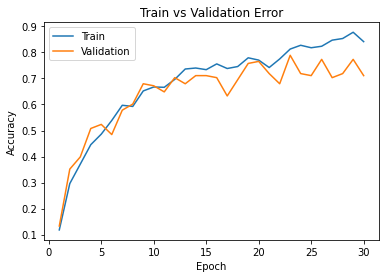

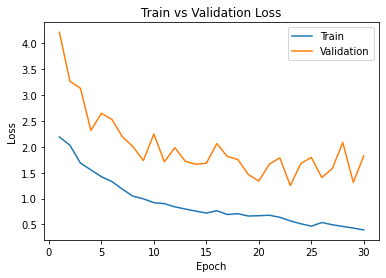

In [ ]:
model_path_1 = get_model_name("letterclassifier", batch_size=128, learning_rate=0.01, epoch=29)
plot_training_curve(model_path_1)

### Part (c) “Overfit” to a Small Dataset - 3 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

In [ ]:
sample_data = get_data_loader('/content/gdrive/MyDrive/Lab 2 Dataset/Janakiraman_1007397158', 27)

#just to feed inputs to my get_accuracy function, I will not be using it here
test_loader = get_data_loader('/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Test', 27)
val_loader = get_data_loader('/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Validation', 27)

In [ ]:
use_cuda = True

net = letterclassifier()

if use_cuda and torch.cuda.is_available():
  net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
num_epochs = 30
# Define the Loss function and optimizer
# Optimizer will be SGD with Momentum.
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

########################################################################
# Set up some numpy arrays to store the training/test loss/erruracy
train_acc = np.zeros(num_epochs)
train_loss = np.zeros(num_epochs)
########################################################################

# Train the network
# Loop over the data iterator and sample a new batch of training data
# Get the output from the network, and optimize our loss function.
start_time = time.time()
for epoch in range(num_epochs):  # loop over the dataset multiple times
    total_train_loss = 0.0
    total_train_acc = 0.0
    total_epoch = 0
    for i, data in enumerate(sample_data, 0):
        # Get the inputs
        inputs, labels = data
        
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          inputs = inputs.cuda()
          labels = labels.cuda()
        #############################################
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Forward pass, backward pass, and optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # Calculate the statistics
        total_train_loss += loss.item()
        total_epoch += len(labels)

    train_loss[epoch] = float(total_train_loss) / (i+1)
    train_acc[epoch] = get_accuracy(net, sample_data, val_loader, test_loader, train=True, test = False, sanity_check= True)

    print(("Epoch {}: Train acc: {}, Train loss: {}").format(
                epoch + 1,
                train_acc[epoch],
                train_loss[epoch]))
    
    # Save the current model (checkpoint) to a file
    model_path = get_model_name(net.name, 27, 0.01, epoch)

    torch.save(net.state_dict(), model_path)
print('Finished Training')
end_time = time.time()
elapsed_time = end_time - start_time
print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

Epoch 1: Train acc: 0.1111111111111111, Train loss: 2.2026631832122803
Epoch 2: Train acc: 0.14814814814814814, Train loss: 2.195122003555298
Epoch 3: Train acc: 0.2222222222222222, Train loss: 2.18453311920166
Epoch 4: Train acc: 0.2222222222222222, Train loss: 2.1593778133392334
Epoch 5: Train acc: 0.5555555555555556, Train loss: 2.10915207862854
Epoch 6: Train acc: 0.8148148148148148, Train loss: 2.032367467880249
Epoch 7: Train acc: 0.5925925925925926, Train loss: 1.9008382558822632
Epoch 8: Train acc: 0.7777777777777778, Train loss: 1.6991959810256958
Epoch 9: Train acc: 0.8888888888888888, Train loss: 1.4051148891448975
Epoch 10: Train acc: 0.9259259259259259, Train loss: 1.049694299697876
Epoch 11: Train acc: 0.9629629629629629, Train loss: 0.6979601383209229
Epoch 12: Train acc: 0.9629629629629629, Train loss: 0.4151417016983032
Epoch 13: Train acc: 0.9629629629629629, Train loss: 0.24040943384170532
Epoch 14: Train acc: 0.9629629629629629, Train loss: 0.14290882647037506
Epoch

It can be seen that we a 100% training accuracy has been achieved. 

### Part 3. Hyperparameter Search [8 pt]

### Part (a) - 2 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

The three hyperparameters I am choosing are 
1. Number of convolutional and linear layers 
2. Batch size 
3. Learning rate

### Part (b) - 2 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

In [ ]:
#Using my previously used model as the base architecture, I am checking what happens if I reduce the number of convolutional layers
class letterclassifier(nn.Module):
    def __init__(self):
        super(letterclassifier, self).__init__()
        self.name = "letterclassifier"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(5, 5)
        self.conv2 = nn.Conv2d(5, 7, 3)
        self.fc1 = nn.Linear(448, 200)
        self.fc2 = nn.Linear(200, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 448)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
use_cuda = True

net = letterclassifier()

if use_cuda and torch.cuda.is_available():
  net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
train_net(net, batch_size=128, learning_rate=0.01, num_epochs=30)

Epoch 1: Train acc: 0.5310054184226369, Train loss: 1.8625348714681773 |Validation acc: 0.484375, Validation loss: 2.8335020542144775
Epoch 2: Train acc: 0.6779048765803732, Train loss: 1.1791765002103953 |Validation acc: 0.6484375, Validation loss: 2.146699905395508
Epoch 3: Train acc: 0.7784467188440698, Train loss: 0.8717764845261207 |Validation acc: 0.7734375, Validation loss: 1.5083072185516357
Epoch 4: Train acc: 0.839855508729681, Train loss: 0.6263499007775233 |Validation acc: 0.71875, Validation loss: 1.394476056098938
Epoch 5: Train acc: 0.8886213124623721, Train loss: 0.47991978434415966 |Validation acc: 0.75, Validation loss: 1.2824798822402954
Epoch 6: Train acc: 0.9121011438892234, Train loss: 0.3789932062992683 |Validation acc: 0.8046875, Validation loss: 1.1953433752059937
Epoch 7: Train acc: 0.9295605057194462, Train loss: 0.3199589986067552 |Validation acc: 0.78125, Validation loss: 1.0568050146102905
Epoch 8: Train acc: 0.9620710415412402, Train loss: 0.2165408558570

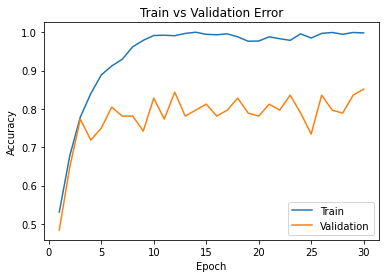

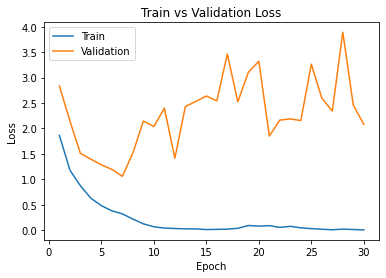

In [ ]:
model_path_2 = get_model_name("letterclassifier", batch_size=128, learning_rate=0.01, epoch=29)
plot_training_curve(model_path_2)

In [35]:
#Now, i am increasing the convolutional layers, as my Calculated padded input size per channel: (1 x 1). Kernel size: (3 x 3). Kernel size can't be greater than actual input size, I am reducing my pooling layer size
class letterclassifier(nn.Module):
    def __init__(self):
        super(letterclassifier, self).__init__()
        self.name = "letterclassifier"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 7, 3)
        self.conv3 = nn.Conv2d(7, 14, 3)
        self.conv4 = nn.Conv2d(14, 7, 3)
        self.fc1 = nn.Linear(1008, 200)
        self.fc2 = nn.Linear(200, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 1008)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [36]:
use_cuda = True

net = letterclassifier()

if use_cuda and torch.cuda.is_available():
  net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

CUDA is available!  Training on GPU ...


In [37]:
train_net(net, batch_size=128, learning_rate=0.01, num_epochs=30)

Epoch 1: Train acc: 0.37627934978928357, Train loss: 2.054977765450111 |Validation acc: 0.359375, Validation loss: 3.1526355743408203
Epoch 2: Train acc: 0.6291390728476821, Train loss: 1.3872110889508174 |Validation acc: 0.6328125, Validation loss: 2.248551368713379
Epoch 3: Train acc: 0.7802528597230584, Train loss: 0.9942440253037673 |Validation acc: 0.6953125, Validation loss: 1.6670606136322021
Epoch 4: Train acc: 0.8007224563515954, Train loss: 0.7165078750023475 |Validation acc: 0.671875, Validation loss: 1.6320171356201172
Epoch 5: Train acc: 0.8717639975918121, Train loss: 0.5122018594008225 |Validation acc: 0.765625, Validation loss: 1.1796830892562866
Epoch 6: Train acc: 0.917519566526189, Train loss: 0.363644356910999 |Validation acc: 0.8359375, Validation loss: 1.3738903999328613
Epoch 7: Train acc: 0.9331727874774233, Train loss: 0.26928003705464876 |Validation acc: 0.828125, Validation loss: 1.185867428779602
Epoch 8: Train acc: 0.9674894641782059, Train loss: 0.20975129

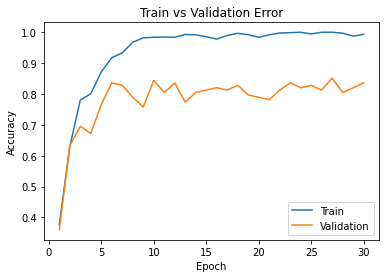

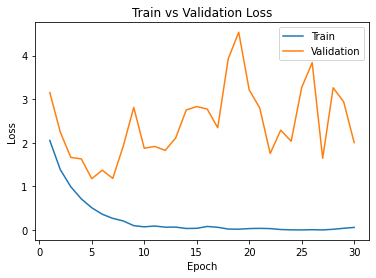

In [39]:
model_path = get_model_name("letterclassifier", batch_size=128, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)

I am keeping my original architecture and seeing what happens when I increase or decrease the linear layers.  

In [ ]:
#increase the linear layers and alter the hidden layer units
#defining the structure
class letterclassifier(nn.Module):
    def __init__(self):
        super(letterclassifier, self).__init__()
        self.name = "letterclassifier"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(5, 5)
        self.conv2 = nn.Conv2d(5, 7, 3)
        self.conv3 = nn.Conv2d(7, 14, 3)
        self.fc1 = nn.Linear(14, 400)
        self.fc2 = nn.Linear(400, 100)
        self.fc3 = nn.Linear(100, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 14)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
use_cuda = True

net = letterclassifier()

if use_cuda and torch.cuda.is_available():
  net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
train_net(net, batch_size=128, learning_rate=0.01, num_epochs=30)

Epoch 1: Train acc: 0.18611609814482347, Train loss: 2.164385897772653 |Validation err: 0.234375, Validation loss: 4.074673175811768
Epoch 2: Train acc: 0.3357271095152603, Train loss: 1.8013042722429549 |Validation err: 0.3671875, Validation loss: 2.69830322265625
Epoch 3: Train acc: 0.43686415320167565, Train loss: 1.6043727397918701 |Validation err: 0.375, Validation loss: 2.7123396396636963
Epoch 4: Train acc: 0.5062836624775583, Train loss: 1.3718804717063904 |Validation err: 0.515625, Validation loss: 2.709725856781006
Epoch 5: Train acc: 0.6439257929383603, Train loss: 1.2811415706362044 |Validation err: 0.578125, Validation loss: 2.143402338027954
Epoch 6: Train acc: 0.6128067025733094, Train loss: 1.0606870225497655 |Validation err: 0.640625, Validation loss: 1.9457128047943115
Epoch 7: Train acc: 0.6540993417115499, Train loss: 0.9677458916391645 |Validation err: 0.65625, Validation loss: 1.969787836074829
Epoch 8: Train acc: 0.713345302214243, Train loss: 0.873269477060863 |

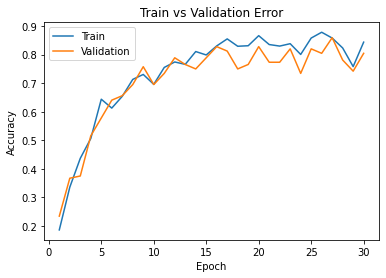

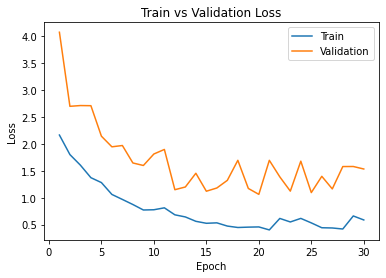

In [ ]:
model_path = get_model_name("letterclassifier", batch_size=128, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)

As the maximum validation accuracy did not increase with increasing hidden layers, I am keeping my architecture to 2 linear layers only. I am keeping 4 convolutional layers and tuning the learning rates.

In [ ]:
#change batch size and reduce learning rate 
class letterclassifier(nn.Module):
    def __init__(self):
        super(letterclassifier, self).__init__()
        self.name = "letterclassifier"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 7, 3)
        self.conv3 = nn.Conv2d(7, 14, 3)
        self.conv4 = nn.Conv2d(14, 7, 3)
        self.fc1 = nn.Linear(1008, 200)
        self.fc2 = nn.Linear(200, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 1008)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
#batch size = 32, learning rate = 0.001
use_cuda = True
net = letterclassifier()

if use_cuda and torch.cuda.is_available():
  net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
train_net(net, batch_size=32, learning_rate=0.001, num_epochs=30)

CUDA is available!  Training on GPU ...
Epoch 1: Train acc: 0.4334738109572547, Train loss: 2.1793938898123226 |Validation acc: 0.40625, Validation loss: 3.845006227493286
Epoch 2: Train acc: 0.6375677302829621, Train loss: 1.329316115150085 |Validation acc: 0.6875, Validation loss: 1.952008843421936
Epoch 3: Train acc: 0.7934978928356412, Train loss: 0.8926664006251556 |Validation acc: 0.71875, Validation loss: 2.0166878700256348
Epoch 4: Train acc: 0.8747742323901264, Train loss: 0.6266715933497136 |Validation acc: 0.84375, Validation loss: 0.9058277010917664
Epoch 5: Train acc: 0.8994581577363034, Train loss: 0.43625695143754667 |Validation acc: 0.6875, Validation loss: 1.1922928094863892
Epoch 6: Train acc: 0.9590608067429259, Train loss: 0.2933108682672565 |Validation acc: 0.90625, Validation loss: 0.821941614151001
Epoch 7: Train acc: 0.9692956050571945, Train loss: 0.1738932878495409 |Validation acc: 0.78125, Validation loss: 1.4086823463439941
Epoch 8: Train acc: 0.966887417218

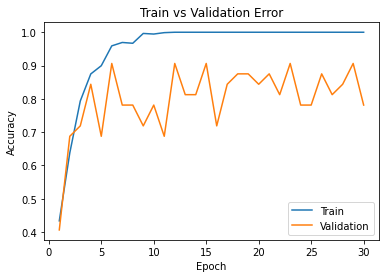

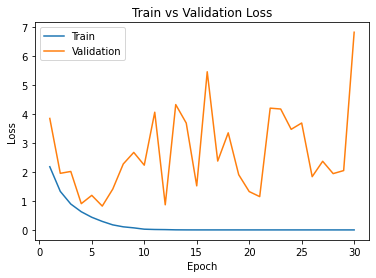

In [ ]:
model_path_3 = get_model_name("letterclassifier", batch_size=32, learning_rate=0.001, epoch=29)
plot_training_curve(model_path_3)

In [ ]:
#batch size = 32, learning rate = 0.0001
use_cuda = True
net = letterclassifier()

if use_cuda and torch.cuda.is_available():
  net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
train_net(net, batch_size=32, learning_rate=0.0001, num_epochs=30)

CUDA is available!  Training on GPU ...
Epoch 1: Train acc: 0.11137868753762793, Train loss: 2.1990593580099254 |Validation acc: 0.15625, Validation loss: 4.388734817504883
Epoch 2: Train acc: 0.177001806140879, Train loss: 2.1955098372239332 |Validation acc: 0.1875, Validation loss: 4.379924774169922
Epoch 3: Train acc: 0.46177001806140877, Train loss: 2.1067239389969754 |Validation acc: 0.4375, Validation loss: 3.5676369667053223
Epoch 4: Train acc: 0.6158940397350994, Train loss: 1.489842522602815 |Validation acc: 0.59375, Validation loss: 2.2788805961608887
Epoch 5: Train acc: 0.6538229981938591, Train loss: 1.1797032012389257 |Validation acc: 0.625, Validation loss: 2.26766037940979
Epoch 6: Train acc: 0.7092113184828417, Train loss: 1.0453719863524804 |Validation acc: 0.71875, Validation loss: 1.76431143283844
Epoch 7: Train acc: 0.7278747742323901, Train loss: 0.9722593495478997 |Validation acc: 0.6875, Validation loss: 1.9267866611480713
Epoch 8: Train acc: 0.7501505117399158, 

KeyboardInterrupt: ignored

In [ ]:
#batch size = 64, learning rate = 0.013
use_cuda = True
net = letterclassifier()

if use_cuda and torch.cuda.is_available():
  net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
train_net(net, batch_size=64, learning_rate=0.013, num_epochs=30)

CUDA is available!  Training on GPU ...
Epoch 1: Train acc: 0.3624322697170379, Train loss: 2.0494755644064684 |Validation acc: 0.28125, Validation loss: 3.290916919708252
Epoch 2: Train acc: 0.6435881998795906, Train loss: 1.3550345507951884 |Validation acc: 0.5, Validation loss: 2.33872127532959
Epoch 3: Train acc: 0.7664057796508128, Train loss: 0.9514299424795004 |Validation acc: 0.765625, Validation loss: 1.7177774906158447
Epoch 4: Train acc: 0.8061408789885611, Train loss: 0.7359262991410035 |Validation acc: 0.6875, Validation loss: 1.5076799392700195
Epoch 5: Train acc: 0.847682119205298, Train loss: 0.6210694049413388 |Validation acc: 0.703125, Validation loss: 1.6208680868148804
Epoch 6: Train acc: 0.8892233594220349, Train loss: 0.5233588436475167 |Validation acc: 0.6875, Validation loss: 1.8113118410110474
Epoch 7: Train acc: 0.8819987959060807, Train loss: 0.4114063542622786 |Validation acc: 0.78125, Validation loss: 0.9302095174789429
Epoch 8: Train acc: 0.893437688139675

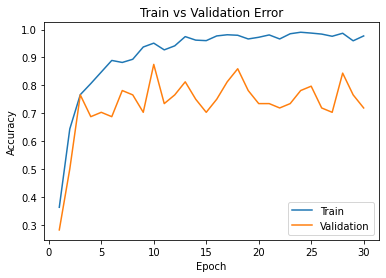

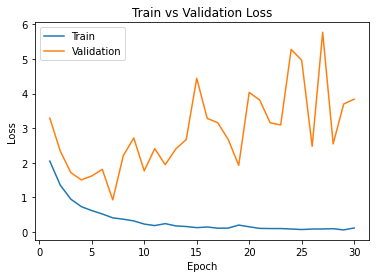

In [ ]:
model_path_4 = get_model_name("letterclassifier", batch_size=64, learning_rate=0.013, epoch=29)
plot_training_curve(model_path_4)

In [ ]:
#batch size = 512, learning rate = 0.01
use_cuda = True
net = letterclassifier()

if use_cuda and torch.cuda.is_available():
  net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
train_net(net, batch_size=512, learning_rate=0.01, num_epochs=50)

CUDA is available!  Training on GPU ...
Epoch 1: Train acc: 0.10475617098133655, Train loss: 2.2424994111061096 |Validation acc: 0.09523809523809523, Validation loss: 4.406339168548584
Epoch 2: Train acc: 0.12221553281155931, Train loss: 2.2006232142448425 |Validation acc: 0.1111111111111111, Validation loss: 4.378012180328369
Epoch 3: Train acc: 0.3576158940397351, Train loss: 2.062881648540497 |Validation acc: 0.32936507936507936, Validation loss: 3.5687668323516846
Epoch 4: Train acc: 0.45755568934376883, Train loss: 1.7387966215610504 |Validation acc: 0.4781746031746032, Validation loss: 3.039137125015259
Epoch 5: Train acc: 0.5731487055990367, Train loss: 1.430136501789093 |Validation acc: 0.5714285714285714, Validation loss: 2.527276039123535
Epoch 6: Train acc: 0.6592414208308248, Train loss: 1.2362525165081024 |Validation acc: 0.6309523809523809, Validation loss: 2.136385679244995
Epoch 7: Train acc: 0.6821192052980133, Train loss: 1.0768931806087494 |Validation acc: 0.67460317

KeyboardInterrupt: ignored

### Part (c) - 2 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

1.	With a batch size of 128, learning rate of 0.01 and 30 epochs, three convolutional layers and 2 linear layers - maximum validation accuracy of 76 % is reached after 20 epochs
2.	With a batch size of 128, learning rate of 0.01 and 30 epochs, two convolutional layers and 2 linear layers - maximum validation accuracy of 85 % is reached after 30 epochs, But from the curve, I can see this could be a potential case of over fitting.
3.	With a batch size of 128, learning rate of 0.01 and 30 epochs, four convolutional layers and 2 linear layers - maximum validation accuracy of 89 % is reached after 12 epochs. 
4.	To tune the learning rate and batch size, I am keeping the 4 layer architecture. With batch size 32 and learning rate 0.001, I am getting a maximum validation accuracy of 90% at 6 epochs. After this, the validation loss keeps oscillating and there is also a bit of overfitting. 
5.	With batch size 32 and learning rate 0.0001, the accuracies do not reach that high, so I am stopping early. 
6.	With batch size 64 and learning rate 0.013, the validation accuracy reaches 87.5 % after 10 epochs. 
7.	With batch size 512 and learning rate 0.01, the validation accuracy is only reaching 81%, after which it is dropping, therefore, I am not continuing. 

Therefore, I am keeping batch size 128, 4 convolutional layers, 2 liner layers, learning rate of 0.01 and 12 epochs

In [21]:
class letterclassifier(nn.Module):
    def __init__(self):
        super(letterclassifier, self).__init__()
        self.name = "letterclassifier"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 7, 3)
        self.conv3 = nn.Conv2d(7, 14, 3)
        self.conv4 = nn.Conv2d(14, 7, 3)
        self.fc1 = nn.Linear(1008, 200)
        self.fc2 = nn.Linear(200, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 1008)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### Part (d) - 2 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [46]:
use_cuda = True
net = letterclassifier()

if use_cuda and torch.cuda.is_available():
  net.cuda()

In [47]:

model_path_cnn_final = get_model_name(net.name, batch_size=128, learning_rate=0.01, epoch=9)
state = torch.load(model_path_cnn_final)
net.load_state_dict(state)

<All keys matched successfully>

In [48]:
test_loader = get_data_loader('/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Test', 128)
train_loader = get_data_loader('/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Train', 128)
val_loader = get_data_loader('/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Validation', 128)
test_acc, test_loss = get_accuracy(net, train_loader, val_loader, test_loader, train=False, test = True, loss = True, criterion= nn.CrossEntropyLoss())

In [49]:
print("The accuracy of the best model on the test set is :", test_acc)
print("The loss of the best model on the test set is :", test_loss)

The accuracy of the best model on the test set is : 0.828125
The loss of the best model on the test set is : 2.730898141860962


### Part 4. Transfer Learning [8 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a) - 2 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [57]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

In [52]:
# img = ... a PyTorch tensor with shape [N,3,224,224] containing hand images ...
test_loader = get_data_loader('/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Test', 512)
train_loader = get_data_loader('/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Train', 2000)
val_loader = get_data_loader('/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Validation', 512)

for img, labels in iter(train_loader):
  features_train = alexnet.features(img)
  labels_train = labels 

for img, labels in iter(val_loader):
  features_val = alexnet.features(img)
  labels_val = labels 

for img, labels in iter(test_loader):
  features_test = alexnet.features(img)
  labels_test = labels 


**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

In [53]:
torch.save(features_train, '/content/gdrive/MyDrive/Lab 2 Dataset/features_train.pt')
torch.save(features_val, '/content/gdrive/MyDrive/Lab 2 Dataset/features_val.pt')
torch.save(features_test, '/content/gdrive/MyDrive/Lab 2 Dataset/features_test.pt')
torch.save(labels_train, '/content/gdrive/MyDrive/Lab 2 Dataset/labels_train.pt')
torch.save(labels_val, '/content/gdrive/MyDrive/Lab 2 Dataset/labels_val.pt')
torch.save(labels_test, '/content/gdrive/MyDrive/Lab 2 Dataset/labels_test.pt')

In [ ]:
check = torch.load('/content/gdrive/MyDrive/Lab 2 Dataset/features_train.pt')

In [ ]:
check.shape

torch.Size([1671, 256, 6, 6])

### Part (b) - 2 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

1. In this model, I am adding only one convolutional layer because the alexnet
features would have already have the important aspects that it has learnt after its immense training. I am choosing two linear layers with one hidden layer in between. 

2. My kernel size is smaller because there are only 6, 6 features, but I am reducing the out put channels from 256 to 170 cause 256 channels would be a lot.

3. I am not adding any pooling layer to the architecture as the number of features are already small in nature. 
The activation funnction remains the same. 

In [ ]:
class ANNClassifier(nn.Module):
    def __init__(self):
        super(ANNClassifier, self).__init__()
        self.name = 'tf_classifier'
        self.conv1 = nn.Conv2d(256, 170, 2)      
        self.fc1 = nn.Linear(4250, 2048)
        self.fc2 = nn.Linear(2048, 9)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = x.view(-1, 4250) #flatten feature data
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### Part (c) - 2 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

In [ ]:
use_cuda = False
net = ANNClassifier()

if use_cuda and torch.cuda.is_available():
  net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')


CUDA is not available.  Training on CPU ...


In [ ]:
train_net(net, batch_size=128, learning_rate=0.01, num_epochs= 15, transfer_learning = True)

Epoch 1: Train acc: 0.3130644190246839, Train loss: 18.00778319285466 |Validation err: 0.30708661417322836, Validation loss: 3.978440761566162
Epoch 2: Train acc: 0.370258880192655, Train loss: 1.6426323377169096 |Validation err: 0.3464566929133858, Validation loss: 3.5117223262786865
Epoch 3: Train acc: 0.40758579169175196, Train loss: 1.4418698732669537 |Validation err: 0.3700787401574803, Validation loss: 3.330122470855713
Epoch 4: Train acc: 0.4105960264900662, Train loss: 1.3910655425145075 |Validation err: 0.33070866141732286, Validation loss: 3.4050791263580322
Epoch 5: Train acc: 0.46116797110174595, Train loss: 1.3435201461498554 |Validation err: 0.3700787401574803, Validation loss: 3.4289915561676025
Epoch 6: Train acc: 0.5081276339554486, Train loss: 1.2406800710237944 |Validation err: 0.4251968503937008, Validation loss: 3.5286989212036133
Epoch 7: Train acc: 0.5960264900662252, Train loss: 1.131465265384087 |Validation err: 0.47244094488188976, Validation loss: 3.433803081

In [17]:
class ANNClassifier(nn.Module):
    def __init__(self):
        super(ANNClassifier, self).__init__()
        self.name = 'tf_classifier'
        self.conv1 = nn.Conv2d(256, 128, 3)      
        self.fc1 = nn.Linear(2048, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 9)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = x.view(-1, 2048) #flatten feature data
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [18]:
use_cuda = False
net = ANNClassifier()

if use_cuda and torch.cuda.is_available():
  net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

CUDA is not available.  Training on CPU ...


In [19]:
train_net(net, batch_size=64, learning_rate=0.0123, num_epochs= 15, transfer_learning = True)

Epoch 1: Train acc: 0.11198073449729079, Train loss: 19.61208649782034 |Validation acc: 0.140625, Validation loss: 4.389658451080322


KeyboardInterrupt: ignored

From my prior training experience, I was aware that if the accuracy starts with 10/11%, it will not reach very high. As the convolutional layer did not perform that well on my dataset, I am just adding linear layers. I believe this is okay because the alexnet model already has an extensive convolutional layer from which it has learnt weights with millions of images. Therefore, I believe that weights should be a sufficient starting point for my linear layers to perform classification. I am starting with experimenting 3 layers and training wuth 128 batch size

In [44]:
class ANNClassifier(nn.Module):
    def __init__(self):
        super(ANNClassifier, self).__init__()
        self.name = 'tf_classifier'
        self.fc1 = nn.Linear(9216, 4608)
        self.fc2 = nn.Linear(4608, 2304)
        self.fc3 = nn.Linear(2304, 9)

    def forward(self, x):
        x = x.view(-1, 9216) #flatten feature data
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [36]:
use_cuda = False
net = ANNClassifier()

if use_cuda and torch.cuda.is_available():
  net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

CUDA is not available.  Training on CPU ...


In [22]:
train_net(net, batch_size=128, learning_rate=0.01, num_epochs= 15, transfer_learning = True)

Epoch 1: Train acc: 0.38531005418422637, Train loss: 288.59417451345 |Validation acc: 0.375, Validation loss: 3.927318811416626
Epoch 2: Train acc: 0.732691149909693, Train loss: 1.6166675320038428 |Validation acc: 0.671875, Validation loss: 2.3812506198883057
Epoch 3: Train acc: 0.8603251053582179, Train loss: 0.7816702952751746 |Validation acc: 0.796875, Validation loss: 2.1050078868865967
Epoch 4: Train acc: 0.8976520168573149, Train loss: 0.35703850709475005 |Validation acc: 0.8515625, Validation loss: 3.327258825302124
Epoch 5: Train acc: 0.8946417820590006, Train loss: 0.3627941975226769 |Validation acc: 0.7421875, Validation loss: 3.27357816696167
Epoch 6: Train acc: 0.930162552679109, Train loss: 0.34080952405929565 |Validation acc: 0.859375, Validation loss: 2.4597418308258057
Epoch 7: Train acc: 0.9397953040337146, Train loss: 0.30952641941033876 |Validation acc: 0.8671875, Validation loss: 1.5713894367218018
Epoch 8: Train acc: 0.9373871161950632, Train loss: 0.1885234942803

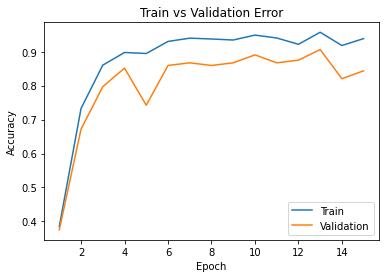

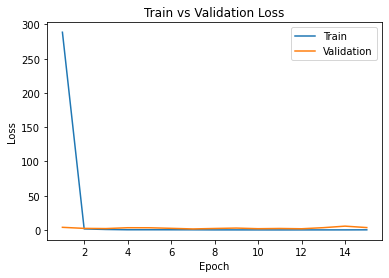

In [23]:
model_path_4 = get_model_name("tf_classifier", batch_size=128, learning_rate=0.01, epoch=14)
plot_training_curve(model_path_4)

I wanted to see if I can somehow improve the results, so I am changing the batch size to 64 and seeing what happens

In [37]:
train_net(net, batch_size=64, learning_rate=0.012, num_epochs= 20, transfer_learning = True)

Epoch 1: Train acc: 0.6634557495484648, Train loss: 188.56874796060416 |Validation acc: 0.640625, Validation loss: 2.49873423576355
Epoch 2: Train acc: 0.8446718844069837, Train loss: 1.2325064471134772 |Validation acc: 0.75, Validation loss: 1.6211477518081665
Epoch 3: Train acc: 0.9193257074051776, Train loss: 0.40868755601919615 |Validation acc: 0.78125, Validation loss: 1.6740493774414062
Epoch 4: Train acc: 0.9494280553883203, Train loss: 0.27234614898379034 |Validation acc: 0.84375, Validation loss: 1.1708835363388062
Epoch 5: Train acc: 0.9650812763395545, Train loss: 0.14002409441253313 |Validation acc: 0.875, Validation loss: 1.4999185800552368
Epoch 6: Train acc: 0.9813365442504516, Train loss: 0.11918700547315754 |Validation acc: 0.859375, Validation loss: 2.421052932739258
Epoch 7: Train acc: 0.9879590608067429, Train loss: 0.059589520866911 |Validation acc: 0.875, Validation loss: 2.192159414291382


KeyboardInterrupt: ignored

This began overfitting, so I stopped. 

I am also checking by increasing the number of layers and seeing if that improves the validation accuracies. 

In [31]:
class ANNClassifier1(nn.Module):
    def __init__(self):
        super(ANNClassifier1, self).__init__()
        self.name = 'tf_classifier1'
        self.fc1 = nn.Linear(9216, 500 *3 * 3)
        self.fc2 = nn.Linear(500 *3 * 3, 100 *3 * 3)
        self.fc3 = nn.Linear(100 *3 * 3, 50 *3 * 3)
        self.fc4 = nn.Linear(50 *3 * 3, 9)

    def forward(self, x):
        x = x.view(-1, 9216) #flatten feature data
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [34]:
use_cuda = True
net = ANNClassifier1()

if use_cuda and torch.cuda.is_available():
  net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

CUDA is available!  Training on GPU ...


In [35]:
train_net(net, batch_size=64, learning_rate=0.01, num_epochs= 15, transfer_learning = True)

Epoch 1: Train acc: 0.42323901264298613, Train loss: 70.48081463575363 |Validation acc: 0.40625, Validation loss: 2.7373101711273193
Epoch 2: Train acc: 0.7194461167971101, Train loss: 1.1136137636808248 |Validation acc: 0.65625, Validation loss: 1.6907203197479248
Epoch 3: Train acc: 0.8657435279951836, Train loss: 0.8231825610766044 |Validation acc: 0.75, Validation loss: 1.7125539779663086
Epoch 4: Train acc: 0.8910295003010235, Train loss: 0.4328614754172472 |Validation acc: 0.765625, Validation loss: 1.8449082374572754
Epoch 5: Train acc: 0.8964479229379891, Train loss: 0.31756386246818763 |Validation acc: 0.796875, Validation loss: 1.979489803314209
Epoch 6: Train acc: 0.8458759783263095, Train loss: 0.24556328872075447 |Validation acc: 0.78125, Validation loss: 2.8149046897888184
Epoch 7: Train acc: 0.9325707405177603, Train loss: 0.39116688588490856 |Validation acc: 0.8125, Validation loss: 1.5552021265029907
Epoch 8: Train acc: 0.9391932570740518, Train loss: 0.250572167623501

KeyboardInterrupt: ignored

I stopped the above code because the same validation accuracy was ocscillating around 84% only.

### Part (d) - 2 pt
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

Based on my training in the previous part, I concluded that three layer ANN worked best with 128 batch size, learning rate of 0.01 and 11 epochs. 

In [ ]:
class ANNClassifier(nn.Module):
    def __init__(self):
        super(ANNClassifier, self).__init__()
        self.name = 'tf_classifier'
        self.fc1 = nn.Linear(9216, 4608)
        self.fc2 = nn.Linear(4608, 2304)
        self.fc3 = nn.Linear(2304, 9)

    def forward(self, x):
        x = x.view(-1, 9216) #flatten feature data
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [43]:
#train_net(net, batch_size=128, learning_rate=0.01, num_epochs= 30)
train_feature = torch.load('/content/gdrive/MyDrive/Lab 2 Dataset/features_train.pt')
val_feature = torch.load('/content/gdrive/MyDrive/Lab 2 Dataset/features_val.pt')
test_feature = torch.load('/content/gdrive/MyDrive/Lab 2 Dataset/features_test.pt')
train_labels = torch.load('/content/gdrive/MyDrive/Lab 2 Dataset/labels_train.pt')
val_labels = torch.load('/content/gdrive/MyDrive/Lab 2 Dataset/labels_val.pt')
test_labels = torch.load('/content/gdrive/MyDrive/Lab 2 Dataset/labels_test.pt')
train_loader = torch.utils.data.DataLoader(TensorDataset(train_feature, train_labels), batch_size=128)
val_loader = torch.utils.data.DataLoader(TensorDataset(val_feature, val_labels), batch_size=128)
test_loader = torch.utils.data.DataLoader(TensorDataset(test_feature, test_labels), batch_size=128)

In [52]:
use_cuda = True
ANN = ANNClassifier()
if use_cuda and torch.cuda.is_available():
  ANN.cuda()
model_path_ann_final = get_model_name(ANN.name, batch_size=128, learning_rate=0.01, epoch=12)
state = torch.load(model_path_ann_final)
ANN.load_state_dict(state)

<All keys matched successfully>

In [53]:
test_acc, test_loss = get_accuracy(ANN, train_loader, val_loader, test_loader, train=False, test = True, loss = True, criterion= nn.CrossEntropyLoss())

In [ ]:
print("The accuracy of the best model on the test set is :", test_acc)
print("The loss of the best model on the test set is :", test_loss)

The accuracy of the best model on the test set is : 0.9296875
The loss of the best model on the test set is : 0.7925570011138916


The accuracy of the test data after transfer learning is around 92% which is way higher than what I was able to achieve with only CNN. Moreover, the CNN training curves oscillated quite a bit, and many of my models during hyperparameter tuning were quite unstable. But, the fully connected model after transfer learning was quite stable. 

### Part 5. Testing on New Data [10 pt]
As a final step in testing we will be revisiting the sample images that you had collected and submitted with your lab. These sample images should be untouched and will be used to demonstrate how well your model works at identifying your hand guestures. 



### Part (a) - 3 pt
Load and process the hand gesture images you had collected so that they can easily be evaulated by your model.

In [55]:
sample_data = get_data_loader('/content/gdrive/MyDrive/Lab 2 Dataset/Janakiraman_1007397158', 27)

#just to feed inputs to my get_accuracy function, I will not be using it anywhere in the function
train_loader = get_data_loader('/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Train', 27)
val_loader = get_data_loader('/content/gdrive/MyDrive/Lab 2 Dataset/Lab_2_Hand_Gesture_Dataset/Validation', 27)

In [58]:
for img, labels in iter(sample_data):
  features_sample = alexnet.features(img)
  labels_sample = labels 

In [59]:
torch.save(features_sample, '/content/gdrive/MyDrive/Lab 2 Dataset/features_sample.pt')
torch.save(labels_sample, '/content/gdrive/MyDrive/Lab 2 Dataset/labels_sample.pt')

In [60]:
sample_data_processed = torch.utils.data.DataLoader(TensorDataset(torch.load('/content/gdrive/MyDrive/Lab 2 Dataset/features_sample.pt'), torch.load('/content/gdrive/MyDrive/Lab 2 Dataset/labels_sample.pt')), batch_size=128)

### Part (b) - 7 pt
Using the best transfer learning model developed in Part 4. Report the test accuracy on your sample images and how it compares to the test accuracy obtained in Part 4(d)? How well did your model do for the different hand guestures? Provide an explanation for why you think your model performed the way it did?  

This question will also be evaluated on the overal performance achieved.

In [61]:
test_acc, test_loss = get_accuracy(ANN, train_loader, val_loader, sample_data_processed, train=False, test = True, loss = True, criterion= nn.CrossEntropyLoss())

In [64]:
print("Test accuracy on my final dataset is:", test_acc)

Test accuracy on my final dataset is: 1.0


In [66]:
print("Test loss on my final dataset is:", test_loss)

Test loss on my final dataset is: 0.0009714980260469019


My model performed really well with my hand dataset. It was able to achieve a 100% accuracy on my unseen data, and this is contrary to the test dataset where it achieved 92% accuracy.

The reason I believe is because, with transfer learning, the feature maps generated are very informative and it really helps in identifying and classifying effectively. With the feature maps, the linear layers were able to nicely classify my hand gestures. Also, my linear layers had a good number of parameters, giving the neural network a lot of parameters to learn and understand the images properly. Three layers, with hidden units led to a lot of training, which enhanced my model's capability to predict. This probably would not have been possible without the transfer learning as just my CNN architecture did not perform that well on the test dataset itself. It could have led to erroneous predictions and lower accuracies. 

Every part of my architecture- from the number of layers to the activation functions, helped in increasing the accuracy. 

Moreover, I believe the reason I could achieve 100% accuracy on my hand gesture dataset was because I did not rotate my hands too much and kept my different orientations to a minimum. 

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
jupyter nbconvert --to html LAB_2_Hand_Gesture_Recognition.ipynb

(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus